In [2]:
#%pip install ipywidgets
#%pip install pandas-profiling
#%pip install sweetviz
#%pip install autoviz
#%pip install dtale
#%pip install umap-learn

In [3]:
import pandas as pd
import umap.umap_ as umap
#import sweetviz #usado mais pra dados rotulados
import dtale
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [5]:
rootPath = "C:\\Users\\mlb\\Teste_VOCs\\DataFiles"
columnsName = ["0","1","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade"]
columnsName2 = ["index","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade","culture_day","c_type"]

In [6]:
#Load albicans file data
#data dictionary
# Albicans = 1
# Glabrata = 2
# Haemulonii = 3
# Kodamaea_ohmeri = 4
# Krusei = 5
# Parapsilosis = 6

#Load Kodamaea file data kodamaea_ohmeri_48hs
df_kodamaea_ohmeri_48h = pd.read_csv(rootPath+"\\kodamaea_ohmeri_48hs.csv", delim_whitespace=True, header=None, names=columnsName)
df_kodamaea_ohmeri_48h = df_kodamaea_ohmeri_48h.drop(["0","1"], axis=1)
df_kodamaea_ohmeri_48h.dropna(inplace=True)
df_kodamaea_ohmeri_48h.reset_index(inplace=True)
df_kodamaea_ohmeri_48h['c_type'] = 4
df_kodamaea_ohmeri_48h['culture_day'] = 2

In [7]:
df_kodamaea_ohmeri_48h.head()

,index,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
0,0,1.623853e+09,95610.0,7305.0,6020.0,60440.0,3980.0,33280.0,8021.0,60.87,100.11,9.05,4,2
1,1,1.623853e+09,95610.0,7305.0,6020.0,60360.0,3983.0,33290.0,8017.0,60.85,100.15,8.97,4,2
2,2,1.623853e+09,95680.0,7305.0,6026.0,60360.0,3991.0,33320.0,8023.0,60.85,100.15,9.01,4,2
3,3,1.623853e+09,95400.0,7305.0,6026.0,60360.0,3989.0,33340.0,8023.0,60.87,100.11,8.86,4,2
4,4,1.623853e+09,95830.0,7305.0,6020.0,60360.0,3996.0,33290.0,8023.0,60.85,100.22,9.07,4,2


In [8]:
df_kodamaea_ohmeri_48h.describe()

,index,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
count,6887.000000,6.887000e+03,6887.000000,6887.000000,6887.000000,6887.000000,6887.000000,6887.000000,6887.000000,6887.000000,6887.000000,6887.000000,6887.0,6887.0
mean,3533.162770,1.623856e+09,27781.525918,42799.475098,22165.636997,25962.805285,347.542805,1200.243168,3503.334689,60.552464,78.799698,8.783515,4.0,2.0
std,2040.121537,1.874114e+03,13759.423653,13411.657588,6225.301379,7687.279515,183.495149,1069.862812,1335.514072,1.172587,20.908812,2.296529,0.0,0.0
min,0.000000,1.623853e+09,8969.000000,7305.000000,6020.000000,13170.000000,167.300000,566.000000,1723.000000,58.070000,54.820000,5.670000,4.0,2.0
25%,1766.500000,1.623854e+09,16895.000000,29360.000000,16960.000000,20470.000000,227.200000,703.000000,2380.500000,59.290000,55.410000,6.120000,4.0,2.0
50%,3531.000000,1.623856e+09,22110.000000,47990.000000,20070.000000,24490.000000,263.000000,857.700000,2887.000000,61.080000,73.050000,9.040000,4.0,2.0
75%,5299.500000,1.623858e+09,38490.000000,55550.000000,28990.000000,29470.000000,448.100000,1540.000000,4727.000000,61.560000,100.070000,11.070000,4.0,2.0
max,7064.000000,1.623859e+09,95830.000000,61290.000000,30670.000000,60820.000000,3996.000000,33340.000000,8023.000000,61.990000,100.500000,11.840000,4.0,2.0


In [9]:
import dtale
d = dtale.show(df_kodamaea_ohmeri_48h)
d.open_browser()

In [10]:
import dtale
d = dtale.show(df_kodamaea_ohmeri_48h.drop(columns=['c_type','index']))
d.open_browser()

In [11]:
df_kodamaea_ohmeri_48h.to_csv(r'DatasetsJoined\AllKodamaea_ohmerCollect.csv', index = False)
df_kodamaea_ohmeri_48h.to_csv(r'NewDatasets\NewKodamaea_ohmerCollect.csv', index = False)

In [12]:
kodamaea_ohmeri_data = df_kodamaea_ohmeri_48h.drop(columns=['c_type'])
scaled_kodamaea_ohmeri_df = StandardScaler().fit_transform(kodamaea_ohmeri_data)
scaled_kodamaea_ohmeri_df

array([[-1.7319651 , -1.71781844,  4.92995933, ...,  1.01927595,
         0.11604646,  0.        ],
       [-1.7314749 , -1.71750927,  4.92995933, ...,  1.02118915,
         0.08120875,  0.        ],
       [-1.7309847 , -1.71720081,  4.93504712, ...,  1.02118915,
         0.0986276 ,  0.        ],
       ...,
       [ 1.72984471,  1.71674519,  0.74634083, ..., -1.11873386,
        -1.17730364,  0.        ],
       [ 1.73033491,  1.71731148,  0.74052621, ..., -1.13930085,
        -1.16859421,  0.        ],
       [ 1.73082512,  1.71765625,  0.74924814, ..., -1.14121406,
        -1.24697906,  0.        ]])

In [13]:
reducer = umap.UMAP()

In [14]:
#Usa os dados reescalonados para a redução de dimensionalidade
embedding = reducer.fit_transform(scaled_kodamaea_ohmeri_df)
embedding.shape

D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



(6887, 2)

In [15]:
#Usa as classes do array original pra plotar a 
# plt.scatter(
#     embedding[:, 0],
#     embedding[:, 1],
#     c=[sns.color_palette()[x] for x in df_albicans_joined.c_type])
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('UMAP projection of the C. Albicans dataset', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the C. Kodamaea ohmeri dataset')

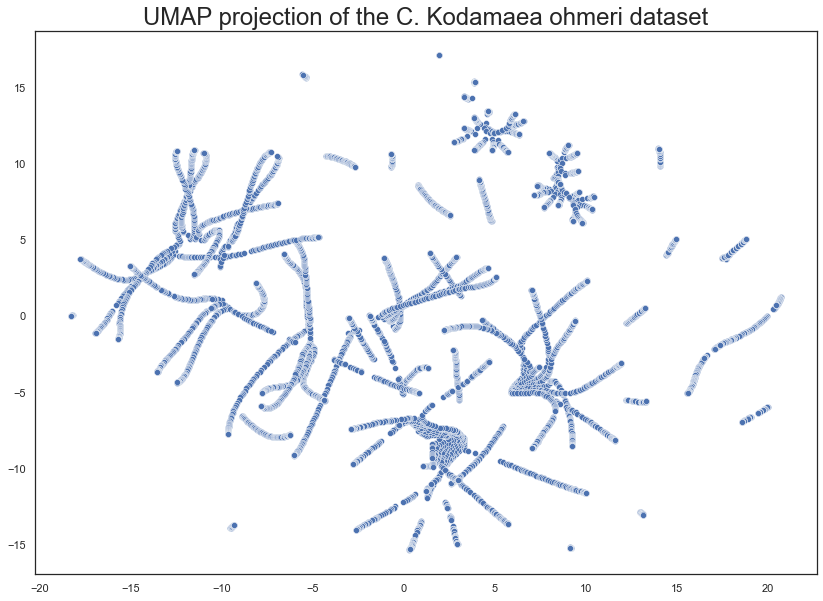

In [16]:
sns.scatterplot(data=embedding, x=embedding[:, 0], y=embedding[:, 1])
plt.title('UMAP projection of the C. Kodamaea ohmeri dataset', fontsize=24)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_kodamaea_ohmeri_df)
result = pd.DataFrame(data = principalComponents
             , columns = ['PCA0', 'PCA1','PCA2'])

Text(0.5, 0.92, 'PCA projection of the C. Kodamaea ohmeri dataset')

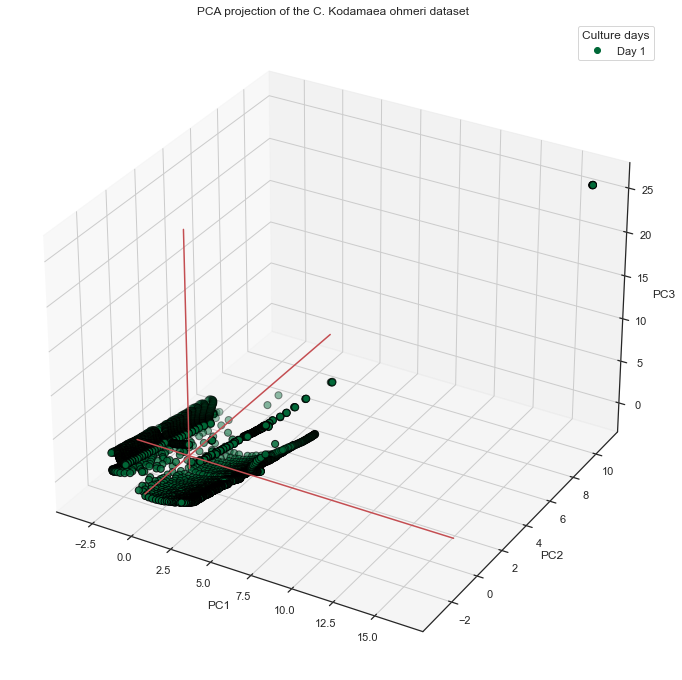

In [18]:
fig = plt.figure(figsize=[15,12])

ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=df_kodamaea_ohmeri_48h.culture_day, cmap="RdYlGn_r", s=50, ec='black')
handles, labels = scatter.legend_elements()
legend2 = ax.legend(handles, ["Day 1","Day 2"], loc="upper right", title="Culture days")

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA projection of the C. Kodamaea ohmeri dataset")

In [19]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(scaled_kodamaea_ohmeri_df)
result2 = pd.DataFrame(data = principalComponents2
             , columns = ['PCA0', 'PCA1'])

Text(0.5, 1.0, 'PCA projection of the  C. Kodamaea ohmeri dataset')

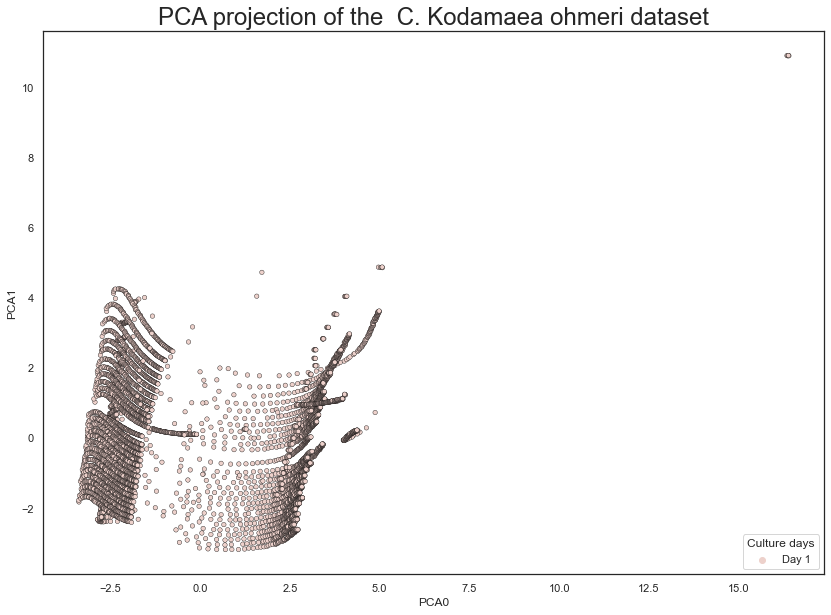

In [20]:
ax = sns.scatterplot(data=result2, x=result2['PCA0'], y=result2['PCA1'],cmap="RdYlGn_r", s=20, ec='black',  hue=df_kodamaea_ohmeri_48h.culture_day)
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ["Day 1", "Day 2"], loc='lower right', title="Culture days")
plt.title('PCA projection of the  C. Kodamaea ohmeri dataset', fontsize=24)